# Cell finding demo

In [1]:
import numpy as np

import seaborn as sns
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import matplotlib.gridspec as gridspec

In [2]:
out = './out/'
data = './data/'

### Just some matplotlib and seaborn parameter tuning

In [3]:
axistitlesize = 20
axisticksize = 17
axislabelsize = 26
axislegendsize = 23
axistextsize = 20
axiscbarfontsize = 15

# Set axtick dimensions
major_size = 6
major_width = 1.2
minor_size = 3
minor_width = 1
mpl.rcParams['xtick.major.size'] = major_size
mpl.rcParams['xtick.major.width'] = major_width
mpl.rcParams['xtick.minor.size'] = minor_size
mpl.rcParams['xtick.minor.width'] = minor_width
mpl.rcParams['ytick.major.size'] = major_size
mpl.rcParams['ytick.major.width'] = major_width
mpl.rcParams['ytick.minor.size'] = minor_size
mpl.rcParams['ytick.minor.width'] = minor_width

mpl.rcParams.update({'figure.autolayout': False})

# Seaborn style settings
sns.set_style({'axes.axisbelow': True,
               'axes.edgecolor': '.8',
               'axes.facecolor': 'white',
               'axes.grid': True,
               'axes.labelcolor': '.15',
               'axes.spines.bottom': True,
               'axes.spines.left': True,
               'axes.spines.right': True,
               'axes.spines.top': True,
               'figure.facecolor': 'white',
               'font.family': ['sans-serif'],
               'font.sans-serif': ['Arial',
                'DejaVu Sans',
                'Liberation Sans',
                'Bitstream Vera Sans',
                'sans-serif'],
               'grid.color': '.8',
               'grid.linestyle': '--',
               'image.cmap': 'rocket',
               'lines.solid_capstyle': 'round',
               'patch.edgecolor': 'w',
               'patch.force_edgecolor': True,
               'text.color': '.15',
               'xtick.bottom': True,
               'xtick.color': '.15',
               'xtick.direction': 'in',
               'xtick.top': True,
               'ytick.color': '.15',
               'ytick.direction': 'in',
               'ytick.left': True,
               'ytick.right': True})

# Colorpalettes, colormaps, etc.
sns.set_palette(palette='rocket')
rocket_cmap = sns.color_palette('rocket', as_cmap=True)

In [52]:
nrows = 10
ncols = 10
step = 0.1

In [53]:
def set_main_grid(nrows, ncols, step):
    main_grid = np.zeros((nrows*ncols, 2))
    # Calculate coordinates of grid points
    for i in range(nrows):
        for j in range(ncols):
            main_grid[i * ncols + j] = np.array((j*step, i*step))
            
    return main_grid

In [54]:
def set_cell_corners(nrows, ncols):
    crows = nrows - 1
    ccols = ncols - 1
    cell_corners = np.zeros((crows*ccols,4), dtype=int)
    
    #Iterate over all points, except the last row and the last column.
    #The iteration is basically over the possible upper left corners for a cell.
    for i in range(crows):
        for j in range(ccols):
            idx = i * ccols + j
            c = i * ncols + j

            cell_corners[idx] = np.array((c, c+1, c+ncols, c+ncols+1))
            
    return cell_corners

In [55]:
def get_current_cell(p, nrows, ncols, step,
                     cell_corners):
    ix = (int)(p[0] / step)
    iy = (int)(p[1] / step)
    # Correct for points on borders
    if(ix == ncols-1): ix = ncols-2
    if(iy == nrows-1): iy = nrows-2

    return cell_corners[iy * (ncols-1) + ix]

In [58]:
p = np.array((0.69*(ncols*step), 0.42*(nrows*step)))

main_grid = set_main_grid(nrows, ncols, step)
cell_corners = set_cell_corners(nrows, ncols)
cell = get_current_cell(p, nrows, ncols, step,
                        cell_corners)

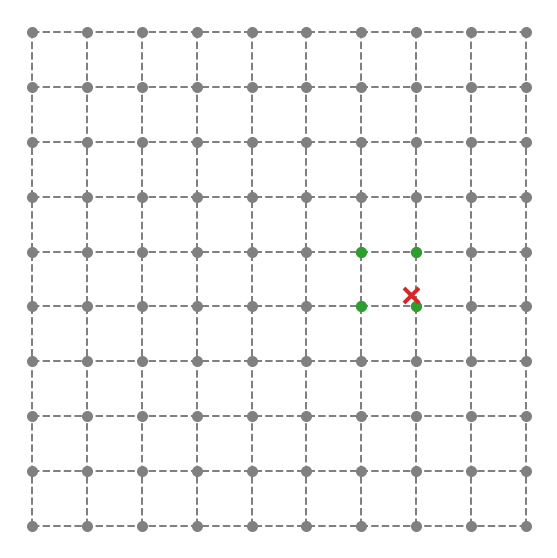

In [59]:
fig, axes = plt.subplots(figsize=(10,10))
axes.set_aspect('equal')
axes.axis('off')

axes.scatter(main_grid[:,0], main_grid[:,1],
             color='grey', s=10**2, zorder=2)

for c in cell:
    axes.scatter(main_grid[c,0], main_grid[c,1],
                 color='tab:green', s=10**2, zorder=3)

for i in range(ncols):
    axes.plot([i*step, i*step], [0, (nrows-1)*step],
              color='grey', ls='--', lw=2, zorder=1)
for i in range(nrows):
    axes.plot([0, (ncols-1)*step], [i*step, i*step],
              color='grey', ls='--', lw=2, zorder=1)
    
axes.scatter(p[0], p[1],
             color='tab:red', marker='x', lw=4, s=15**2, zorder=4)
    
plt.show()